The Real Problem

Recognizing multi-digit numbers in photographs captured at street level is an important

component of modern-day map making. A classic example of a corpus of such street

level photographs are Google’s Street View imagery comprised of hundreds of millions of

geo-located 360-degree panoramic images. The ability to automatically transcribe an

address number from a geo-located patch of pixels and associate the transcribed

number with a known street address helps pinpoint, with a high degree of accuracy, the

location of the building it represents.

More broadly, recognizing numbers in photographs is a problem of interest to the optical

character recognition community. While OCR on constrained domains like document

processing is well studied, arbitrary multi-character text recognition in photographs is

still highly challenging. This difficulty arises due to the wide variability in the visual

appearance of text in the wild on account of a large range of fonts, colors, styles,

orientations, and character arrangements. The recognition problem is further

complicated by environmental factors such as lighting, shadows, specularities, and

occlusions as well as by image acquisition factors such as resolution, motion, and focus

blurs.

In this project, we will use the dataset with images centered around a single digit (many of the

images do contain some distractors at the sides). Although we are taking a sample of

the data which is simpler, it is more complex than MNIST because of the distractors.

The Street View House Numbers (SVHN) Dataset

SVHN is a real-world image dataset for developing machine learning and object

recognition algorithms with the minimal requirement on data formatting but comes from a

significantly harder, unsolved, real-world problem (recognizing digits and numbers in

natural scene images). SVHN is obtained from house numbers in Google Street View

images.

Importing Libraries , Using Tensorflow version 2


In [0]:
%tensorflow_version 2.x

In [0]:
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report

In [3]:
tf.__version__

'2.2.0-rc1'

Mounting Google Drive and Reading Data from the file

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
abc=h5py.File('/content/drive/My Drive/Colab Notebooks/SVHN_single_grey1.h5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [6]:
list(abc.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [7]:
print("Data shape and type of X_train are  {} and {}".format(abc['X_train'].shape,abc['X_train'].dtype))

Data shape and type of X_train are  (42000, 32, 32) and float32


In [8]:
print("Data shape and type of X_test are  {} and {}".format(abc['X_test'].shape,abc['X_test'].dtype))

Data shape and type of X_test are  (18000, 32, 32) and float32


In [9]:
print("Data shape and type of y_test are  {} and {}".format(abc['y_test'].shape,abc['y_test'].dtype))

Data shape and type of y_test are  (18000,) and uint8


In [10]:
print("Data shape and type of y_train are  {} and {}".format(abc['y_train'].shape,abc['y_train'].dtype))

Data shape and type of y_train are  (42000,) and uint8


In [11]:
print("Data shape and type of y_val are  {} and {}".format(abc['y_val'].shape,abc['y_val'].dtype))

Data shape and type of y_val are  (60000,) and uint8


In [12]:
print("Data shape and type of X_val are  {} and {}".format(abc['X_val'].shape,abc['X_val'].dtype))

Data shape and type of X_val are  (60000, 32, 32) and float32


In [0]:
X_train=abc['X_train']
X_test=abc['X_test']
y_train=abc['y_train']
y_test=abc['y_test']
X_val=abc['X_val']
y_val=abc['y_val']


Observations:
The provided data is in the HDF5 dataset format.
The feature image is in 2 dimenstional format.
Three Data sets are provided - Train, Test and Validation
The feature should be converted to 1 dimensional format to predict through algorithmns. and then is performed in model definition

Printing first 30 images

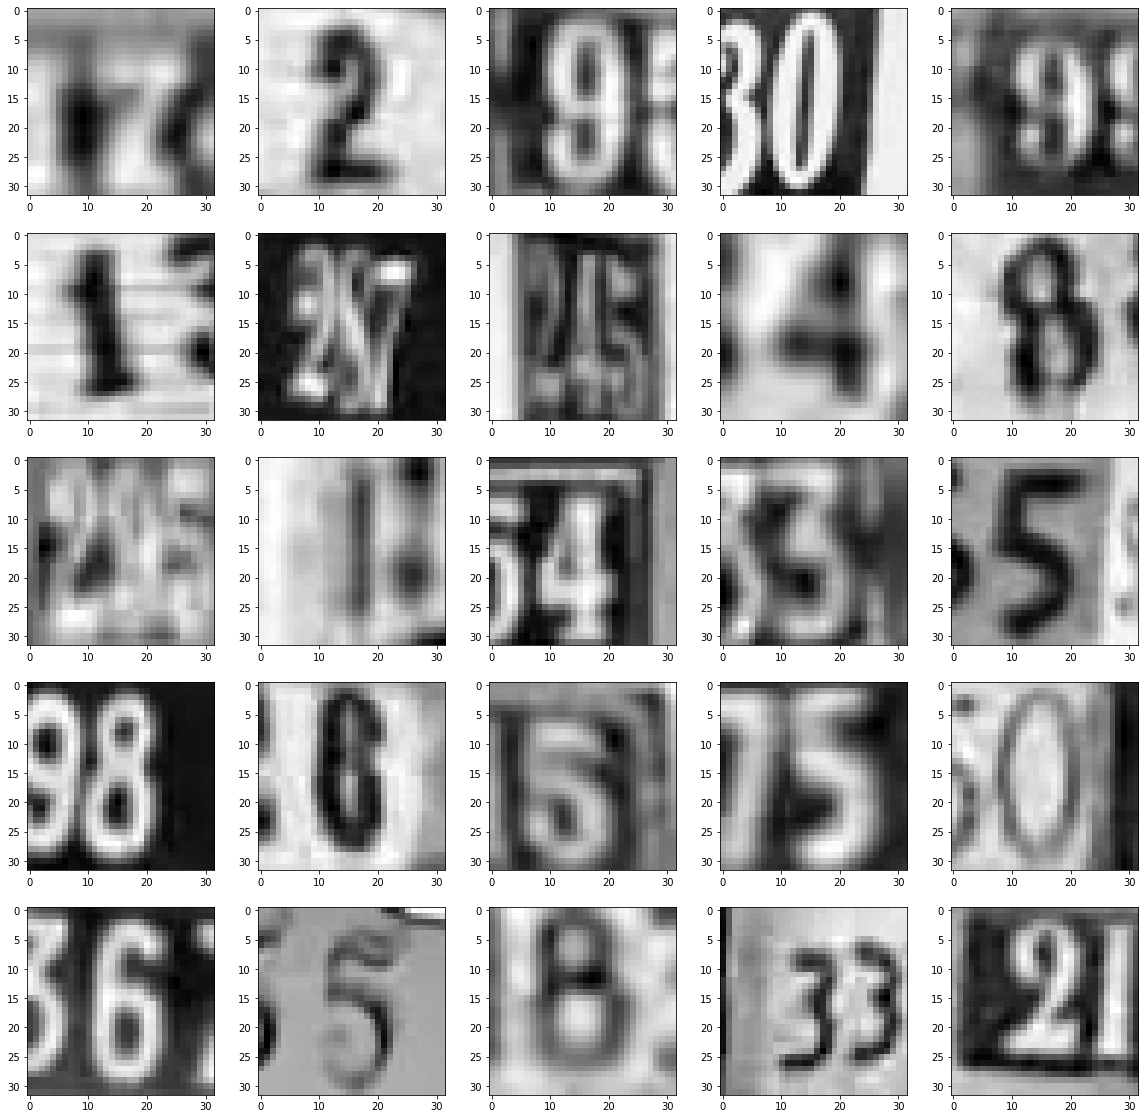

In [14]:
fig=plt.figure(figsize=(20,20))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

Priniting one image to validate

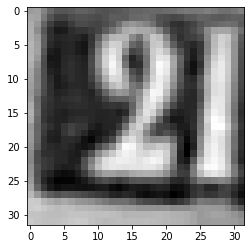

In [15]:
img = X_test[25]
plt.imshow(img,cmap='gray')

In [16]:
y_test.value

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


array([1, 7, 2, ..., 7, 9, 2], dtype=uint8)

In [17]:
y_train.value

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  """Entry point for launching an IPython kernel.


array([2, 6, 7, ..., 7, 0, 4], dtype=uint8)

Applying one hot encoding on labels, since model output will use sigmoid activation function and give generate mutiple probability output

In [0]:
y_test=tf.keras.utils.to_categorical(y_test, num_classes=10)
y_train=tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val=tf.keras.utils.to_categorical(y_val,num_classes=10)


Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (without batch Normalization)

In [0]:
# Initialize Sequential model
model = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32*32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))


In [0]:
# Hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(150, activation='relu', name='Layer_2'))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.5))

# Hidden layers
model.add(tf.keras.layers.Dense(60, activation='relu', name='Layer_3'))
model.add(tf.keras.layers.Dense(30, activation='relu', name='Layer_4'))



# Dropout layer
model.add(tf.keras.layers.Dropout(0.3))

Adding Softmax at final layer

In [0]:
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [0]:
adam_opt=tf.keras.optimizers.Adam(learning_rate=0.001,epsilon=1e-06,beta_1=0.9)


In [0]:
model.compile(optimizer=adam_opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Layer_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 60)                9060      
_________________________________________________________________
Layer_4 (Dense)              (None, 30)                1830      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0

Model Evaluation using Adam optimizer

In [25]:
model.fit(X_train, y_train, epochs=50, batch_size=200,validation_data=(np.array(X_test), y_test),shuffle=False)

Epoch 1/50
210/210 [==============================] - 3s 17ms/step - loss: 5.2831 - accuracy: 0.0998 - val_loss: 2.3025 - val_accuracy: 0.1010
Epoch 2/50
210/210 [==============================] - 3s 15ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.0982
Epoch 3/50
210/210 [==============================] - 2s 11ms/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3025 - val_accuracy: 0.0984
Epoch 4/50
210/210 [==============================] - 2s 12ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3027 - val_accuracy: 0.0954
Epoch 5/50
210/210 [==============================] - 2s 12ms/step - loss: 2.3028 - accuracy: 0.1011 - val_loss: 2.3027 - val_accuracy: 0.0955
Epoch 6/50
210/210 [==============================] - 2s 12ms/step - loss: 2.3033 - accuracy: 0.1011 - val_loss: 2.3027 - val_accuracy: 0.0958
Epoch 7/50
210/210 [==============================] - 2s 12ms/step - loss: 2.3028 - accuracy: 0.1016 - val_loss: 2.3027 - val_accuracy: 0.0956

In [26]:
loss,accuracyscore=model.evaluate(X_test,y_test)

563/563 [==============================] - 1s 3ms/step - loss: 2.3028 - accuracy: 0.0955


In [27]:
print("On validation data loss and accuracy is {} and {}".format(loss,accuracyscore))

On validation data loss and accuracy is 2.302759885787964 and 0.09549999982118607


In [28]:
predict_y_test=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [29]:
predict_y_test.shape

(18000,)

In [30]:
predict_y_test

array([3, 3, 3, ..., 3, 3, 3])

In [0]:
y_test_index=np.argmax(y_test,axis=1)

In [32]:
# On Test data
print(classification_report(y_test_index,predict_y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1814
           1       0.00      0.00      0.00      1828
           2       0.00      0.00      0.00      1803
           3       0.10      1.00      0.17      1719
           4       0.00      0.00      0.00      1812
           5       0.00      0.00      0.00      1768
           6       0.00      0.00      0.00      1832
           7       0.00      0.00      0.00      1808
           8       0.00      0.00      0.00      1812
           9       0.00      0.00      0.00      1804

    accuracy                           0.10     18000
   macro avg       0.01      0.10      0.02     18000
weighted avg       0.01      0.10      0.02     18000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
predict_y_train_adam=model.predict_classes(X_train)

In [0]:
y_train_index_adam=np.argmax(y_train,axis=1)

In [36]:
#On Train Data
print(classification_report(y_train_index_adam,predict_y_train_adam))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4186
           1       0.00      0.00      0.00      4172
           2       0.00      0.00      0.00      4197
           3       0.10      1.00      0.19      4281
           4       0.00      0.00      0.00      4188
           5       0.00      0.00      0.00      4232
           6       0.00      0.00      0.00      4168
           7       0.00      0.00      0.00      4192
           8       0.00      0.00      0.00      4188
           9       0.00      0.00      0.00      4196

    accuracy                           0.10     42000
   macro avg       0.01      0.10      0.02     42000
weighted avg       0.01      0.10      0.02     42000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model Evaluation using SGD optimizer


Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (with batch Normalization)

In [0]:
# Initialize Sequential model
model1 = tf.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32*32 to 1024
model1.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

model1.add(tf.keras.layers.BatchNormalization(axis=1))


In [0]:


# Hidden layers
model1.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model1.add(tf.keras.layers.Dense(150, activation='relu', name='Layer_2'))

# Dropout layer
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dropout(0.5))

# Hidden layers
model1.add(tf.keras.layers.Dense(60, activation='relu', name='Layer_3'))
model1.add(tf.keras.layers.Dense(30, activation='relu', name='Layer_4'))



# Dropout layer
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dropout(0.3))


model1.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [0]:
sgd_opt=tf.keras.optimizers.SGD()

In [0]:
model1.compile(optimizer=sgd_opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Layer_2 (Dense)              (None, 150)               30150     
_________________________________________________________________
batch_normalization_1 (Batch (None, 150)               600       
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 60)               

In [42]:
model1.fit(X_train, y_train, epochs=50, batch_size=200,validation_data=(np.array(X_val), y_val),shuffle=False)

Epoch 1/50
210/210 [==============================] - 4s 20ms/step - loss: 2.6709 - accuracy: 0.1255 - val_loss: 2.1709 - val_accuracy: 0.1975
Epoch 2/50
210/210 [==============================] - 4s 19ms/step - loss: 2.2814 - accuracy: 0.1841 - val_loss: 1.9609 - val_accuracy: 0.3036
Epoch 3/50
210/210 [==============================] - 4s 19ms/step - loss: 2.0941 - accuracy: 0.2412 - val_loss: 1.8002 - val_accuracy: 0.3978
Epoch 4/50
210/210 [==============================] - 4s 19ms/step - loss: 1.9408 - accuracy: 0.2970 - val_loss: 1.6679 - val_accuracy: 0.4674
Epoch 5/50
210/210 [==============================] - 4s 19ms/step - loss: 1.8291 - accuracy: 0.3473 - val_loss: 1.5534 - val_accuracy: 0.5278
Epoch 6/50
210/210 [==============================] - 4s 20ms/step - loss: 1.7130 - accuracy: 0.3985 - val_loss: 1.4446 - val_accuracy: 0.5773
Epoch 7/50
210/210 [==============================] - 4s 19ms/step - loss: 1.6175 - accuracy: 0.4406 - val_loss: 1.3440 - val_accuracy: 0.6081

In [43]:
loss,accuracyscore=model1.evaluate(X_test,y_test)

563/563 [==============================] - 2s 3ms/step - loss: 0.5809 - accuracy: 0.8238


In [53]:
loss,accuracyscore=model1.evaluate(X_train,y_train)

1313/1313 [==============================] - 4s 3ms/step - loss: 0.4483 - accuracy: 0.8643


In [44]:
print("On validation data loss and accuracy is {} and {}".format(loss,accuracyscore))

On validation data loss and accuracy is 0.5808805823326111 and 0.8238333463668823


In [45]:
predict_y_test=model1.predict_classes(X_test)

In [46]:
predict_y_test.shape

(18000,)

In [47]:
predict_y_test

array([4, 7, 2, ..., 7, 9, 2])

In [0]:
y_test_index=np.argmax(y_test,axis=1)

Classification Accuracy Matrix

In [49]:
#On Test data
print(classification_report(y_test_index,predict_y_test))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1814
           1       0.84      0.84      0.84      1828
           2       0.86      0.83      0.84      1803
           3       0.78      0.77      0.77      1719
           4       0.87      0.86      0.86      1812
           5       0.81      0.82      0.81      1768
           6       0.84      0.81      0.82      1832
           7       0.85      0.85      0.85      1808
           8       0.75      0.80      0.78      1812
           9       0.80      0.79      0.80      1804

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000



In [50]:
predict_y_train=model1.predict_classes(X_train)

In [0]:
y_train_index=np.argmax(y_train,axis=1)

In [52]:
#On Training data
print(classification_report(y_train_index,predict_y_train,))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4186
           1       0.85      0.88      0.87      4172
           2       0.90      0.88      0.89      4197
           3       0.86      0.80      0.83      4281
           4       0.90      0.89      0.90      4188
           5       0.85      0.85      0.85      4232
           6       0.87      0.84      0.86      4168
           7       0.89      0.90      0.89      4192
           8       0.79      0.85      0.82      4188
           9       0.86      0.86      0.86      4196

    accuracy                           0.86     42000
   macro avg       0.86      0.86      0.86     42000
weighted avg       0.86      0.86      0.86     42000




Observations:
After batch normalization, the model is performing better.
Still the model can be improved optimizing dropouts and learning rates.


Deep Neural Network is data hungry. DNN yields better results with more data. As we see here in classification report, we have utmost equally distributed data in all the classes. So DNN learns the each class better and yields better results.¶